In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [11]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [12]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [13]:
n_repeat = 100
result_df = pd.DataFrame(columns=['acc', 'sen', 'spc', 'prc'])

for i in range(n_repeat):
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
    
    # Train the model
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc, sen, spc, prc = classification_metrics(y_test, y_pred)

    # Add to the dataframe
    result_df.loc[len(result_df)] = [acc, sen, spc, prc]

In [14]:
result_df

,acc,sen,spc,prc
0,0.973684,0.971429,0.977273,0.985507
1,1.000000,1.000000,1.000000,1.000000
2,0.956140,0.973333,0.923077,0.960526
3,0.938596,0.956522,0.911111,0.942857
4,0.964912,0.973333,0.948718,0.973333
...,...,...,...,...
95,0.973684,1.000000,0.936170,0.957143
96,0.956140,0.983051,0.927273,0.935484
97,0.973684,1.000000,0.928571,0.960000
98,0.973684,0.975610,0.968750,0.987654


In [15]:
result_df.mean()

acc    0.974123
sen    0.985734
spc    0.955075
prc    0.973695
dtype: float64

In [16]:
result_df.std()

acc    0.014181
sen    0.013217
spc    0.031607
prc    0.018561
dtype: float64

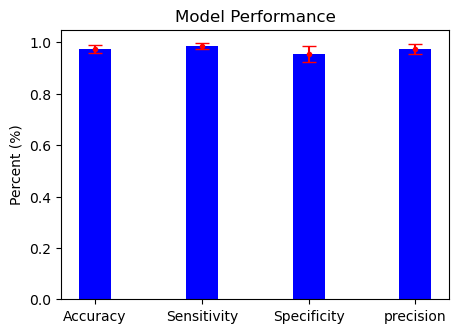

In [17]:
x = np.array(["Accuracy", "Sensitivity", "Specificity", "precision"])
y = np.array(result_df.mean())
s = np.array(result_df.std())

fig, ax = plt.subplots(figsize=(5, 3.5)) 
plt.bar(x, y, width = 0.3, color = 'b')
ax.errorbar(x, y, yerr=s, fmt='.', color='r', capsize=5)

plt.ylabel("Percent (%)")
plt.title("Model Performance")
plt.show()